In [11]:
import sys
sys.path.append('../../')

import estraces
import scared
import matplotlib.pyplot as plt
from kresca.plot import CurvePlot
from kresca.attack import NonProfileAttack

## Import Traces

In [2]:
ths = estraces.read_ths_from_ets_file('../../Traces/DES_1k.ets')

In [3]:
print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file ../../Traces/DES_1k.ets with 1000 traces.
ciphertext.......: uint8
key..............: uint8
plaintext........: uint8



## Plot Traces

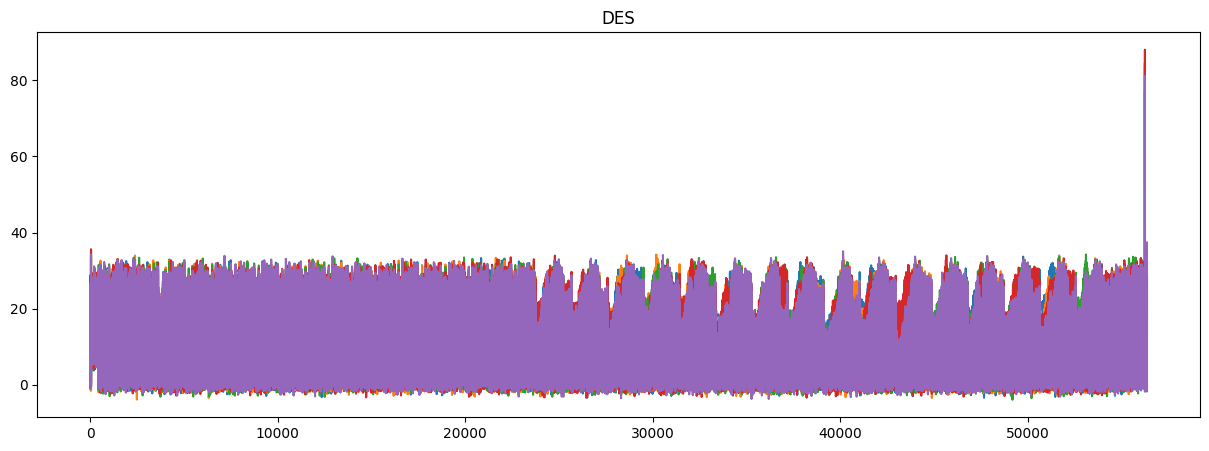

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(ths.samples[:5].T)
plt.title('DES')
plt.show()

In [ ]:
#put inline=True if you want to display on notebook
CurvePlot(ths.samples[:5]) 

## Make Selection Functions

In [5]:
first_addroundkey = scared.des.selection_functions.encrypt.FirstAddRoundKey()
first_sboxes = scared.des.selection_functions.encrypt.FirstSboxes()
first_feistel = scared.des.selection_functions.encrypt.FeistelRFirstRounds()
first_deltaround = scared.des.selection_functions.encrypt.DeltaRFirstRounds()
last_addroundkey = scared.des.selection_functions.encrypt.LastAddRoundKey()
last_sboxes = scared.des.selection_functions.encrypt.LastSboxes()
last_feistel = scared.des.selection_functions.encrypt.FeistelRLastRounds()
last_deltaround = scared.des.selection_functions.encrypt.DeltaRLastRounds()

In [6]:
DES_selection_functions = {
#     'DES First Add Round Key': first_addroundkey,
    'DES First Sboxes': first_sboxes,
    'DES First Feistel': first_feistel,
#     'DES First Delta Round': first_deltaround,
#     'DES Last Add Round Key': last_addroundkey,
    'DES Last Sboxes': last_sboxes,
    'DES Last Feistel': last_feistel,
#     'DES Last Delta Round': last_deltaround,
}

## Make Attack Object

In [7]:
attack = NonProfileAttack(
    ths=ths,
    selection_functions=DES_selection_functions
)

In [8]:
attack.run()

selection_function: DES First Sboxes
selection_function: DES First Feistel
selection_function: DES Last Sboxes
selection_function: DES Last Feistel


In [9]:
attack.report()

,0,1,2,3,4,5,6,7
Scores,0.719,0.725,0.691,0.717,0.714,0.707,0.719,0.683
Found Bytes,0x18,0x13,0x8,0x8,0x5,0x32,0x2b,0x2
Expected,0x18,0x13,0x8,0x8,0x5,0x32,0x2b,0x2
Rank,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7
Scores,0.368,0.407,0.388,0.427,0.361,0.384,0.362,0.368
Found Bytes,0x18,0x13,0x8,0x8,0x5,0x32,0x2b,0x2
Expected,0x18,0x13,0x8,0x8,0x5,0x32,0x2b,0x2
Rank,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7
Scores,0.716,0.722,0.704,0.721,0.735,0.715,0.711,0.716
Found Bytes,0xa,0x11,0x3a,0x2,0x28,0x34,0xe,0x0
Expected,0xa,0x11,0x3a,0x2,0x28,0x34,0xe,0x0
Rank,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7
Scores,0.383,0.407,0.438,0.382,0.424,0.360,0.351,0.357
Found Bytes,0xa,0x11,0x3a,0x2,0x28,0x34,0xe,0x0
Expected,0xa,0x11,0x3a,0x2,0x28,0x34,0xe,0x0
Rank,0,0,0,0,0,0,0,0


In [10]:
attack.show_result()

======================================== DES First Sboxes  =========================================


C:\Users\Tes\miniconda3\envs\SCA\lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


Output(layout=Layout(height='400px'))

======================================== DES First Feistel  ========================================


Output(layout=Layout(height='400px'))

========================================= DES Last Sboxes  =========================================


Output(layout=Layout(height='400px'))

======================================== DES Last Feistel  =========================================


Output(layout=Layout(height='400px'))